In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
hr = pd.read_csv("/content/drive/MyDrive/HR_comma_sep.csv")

In [ ]:
hr.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [ ]:
y = hr["left"]

X0 = pd.get_dummies(hr, drop_first = True)
X = X0.drop("left", axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [ ]:
X.shape

(14999, 18)

In [ ]:
mm = MinMaxScaler()

X_train_scl = mm.fit_transform(X_train)
X_test_scl = mm.fit_transform(X_test)

# Model Definition

In [ ]:
tf.random.set_seed(2022)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense( 20, activation = "relu", input_shape = (18,) ),
    tf.keras.layers.Dense( 10, activation ="relu"),
    tf.keras.layers.Dense( 5, activation ="relu"),
    tf.keras.layers.Dense( 1, activation ="sigmoid")
])

In [ ]:
model.compile(optimizer = "adam", #used optimizer as Adam here
              loss = tf.keras.losses.BinaryFocalCrossentropy(),
              metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early = EarlyStopping(monitor = "val_loss",
                      min_delta = 0.0001, patience = 10,
                      verbose = 3, restore_best_weights = True)

In [ ]:
history = model.fit(X_train_scl,
                    y_train,
                    validation_data = (X_test_scl, y_test),
                    epochs = 1000,
                    callbacks = [early])

Epoch 1/1000
329/329 [==============================] - 2s 4ms/step - loss: 0.1416 - accuracy: 0.7212 - val_loss: 0.1202 - val_accuracy: 0.7804
Epoch 2/1000
329/329 [==============================] - 1s 3ms/step - loss: 0.1122 - accuracy: 0.7852 - val_loss: 0.1077 - val_accuracy: 0.7847
Epoch 3/1000
329/329 [==============================] - 2s 5ms/step - loss: 0.1011 - accuracy: 0.8012 - val_loss: 0.0960 - val_accuracy: 0.8158
Epoch 4/1000
329/329 [==============================] - 1s 4ms/step - loss: 0.0844 - accuracy: 0.8549 - val_loss: 0.0750 - val_accuracy: 0.8802
Epoch 5/1000
329/329 [==============================] - 1s 4ms/step - loss: 0.0632 - accuracy: 0.9124 - val_loss: 0.0588 - val_accuracy: 0.9256
Epoch 6/1000
329/329 [==============================] - 1s 4ms/step - loss: 0.0515 - accuracy: 0.9370 - val_loss: 0.0525 - val_accuracy: 0.9380
Epoch 7/1000
329/329 [==============================] - 1s 4ms/step - loss: 0.0467 - accuracy: 0.9451 - val_loss: 0.0481 - val_accuracy:

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                380       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________
None


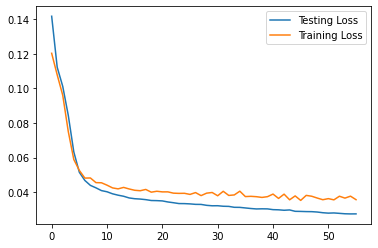

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "Testing Loss")
plt.plot(history.history["val_loss"], label = "Training Loss")
plt.legend(loc = "best")
plt.show()